# Capstone 2: Data Wrangling

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Collection - Loading the dataset

In [36]:
df = pd.read_csv('Capstone2_Modeling_Dataset.csv')
df["X_DT"] = pd.to_datetime(df["X_DT"])  # Formatting the date
df.set_index("X_DT", inplace=True, drop=False)

## Data Definition

Printing the column Names in Dataset

In [23]:
df.columns

Index(['X_DT', 'M_Paid_Views', 'M_Organic_Views', 'M_Google_Impressions',
       'M_Email_Impressions', 'M_Facebook_Impressions',
       'M_Affiliate_Impressions', 'M_Overall_Views', 'O_Sales',
       'D_Thanksgiving', 'D_CyberMonday', 'D_ValentinesDay', 'D_PresidentsDay',
       'D_BackToSchoolSale', 'D_LaborDay', 'D_YomKippur', 'D_ColumbusDay',
       'D_Halloween', 'D_VeteransDay', 'D_Christmas', 'D_NewYearsDay',
       'EC_CPI', 'EC_RTL_SALES'],
      dtype='object')

Printing the data types

In [24]:
df.dtypes

X_DT                       datetime64[ns]
M_Paid_Views                        int64
M_Organic_Views                     int64
M_Google_Impressions                int64
M_Email_Impressions               float64
M_Facebook_Impressions              int64
M_Affiliate_Impressions             int64
M_Overall_Views                     int64
O_Sales                             int64
D_Thanksgiving                      int64
D_CyberMonday                       int64
D_ValentinesDay                     int64
D_PresidentsDay                     int64
D_BackToSchoolSale                  int64
D_LaborDay                          int64
D_YomKippur                         int64
D_ColumbusDay                       int64
D_Halloween                         int64
D_VeteransDay                       int64
D_Christmas                         int64
D_NewYearsDay                       int64
EC_CPI                            float64
EC_RTL_SALES                        int64
dtype: object

Calculating summary statistics for each of the columns

In [26]:
df.describe()

,M_Paid_Views,M_Organic_Views,M_Google_Impressions,M_Email_Impressions,M_Facebook_Impressions,M_Affiliate_Impressions,M_Overall_Views,O_Sales,D_Thanksgiving,D_CyberMonday,...,D_BackToSchoolSale,D_LaborDay,D_YomKippur,D_ColumbusDay,D_Halloween,D_VeteransDay,D_Christmas,D_NewYearsDay,EC_CPI,EC_RTL_SALES
count,1.130000e+02,1.130000e+02,1.130000e+02,1.130000e+02,1.130000e+02,1.130000e+02,1.130000e+02,1.130000e+02,113.000000,113.000000,...,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,1.130000e+02
mean,4.075364e+05,3.606032e+05,2.392669e+07,2.053375e+07,7.266426e+06,6.185944e+05,7.554847e+05,5.019338e+06,0.017699,0.017699,...,0.035398,0.017699,0.017699,0.017699,0.017699,0.017699,0.017699,0.017699,247.558018,1.331832e+06
std,5.251954e+05,4.225487e+05,2.101995e+07,6.097823e+06,8.405028e+06,1.959854e+05,8.844044e+05,3.251234e+06,0.132443,0.132443,...,0.185607,0.132443,0.132443,0.132443,0.132443,0.132443,0.132443,0.132443,2.801106,2.198385e+04
min,1.070900e+04,1.096500e+04,1.206100e+04,1.007069e+07,1.227900e+04,3.263280e+05,1.191900e+04,2.552923e+06,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,241.919000,1.297690e+06
25%,1.362300e+04,1.491100e+04,1.433894e+07,1.677752e+07,2.583516e+06,4.508430e+05,1.518100e+04,3.448392e+06,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,245.770000,1.318259e+06
50%,2.469200e+05,1.406330e+05,2.027664e+07,1.960965e+07,4.886863e+06,5.492310e+05,4.575920e+05,3.812013e+06,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,247.038000,1.324329e+06
75%,6.477400e+05,6.185280e+05,2.645987e+07,2.254236e+07,8.634096e+06,7.876270e+05,1.182369e+06,5.119805e+06,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,250.236000,1.343682e+06
max,3.028085e+06,1.748672e+06,1.103897e+08,5.259952e+07,5.467127e+07,1.234005e+06,3.741069e+06,2.026827e+07,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,251.935000,1.367465e+06


## Data Cleaning

Checking if X_DT is a unique identifier

In [27]:
df.X_DT.is_unique

True

Checking null values in the dataframe

In [28]:
df.isnull().sum()

X_DT                       0
M_Paid_Views               0
M_Organic_Views            0
M_Google_Impressions       0
M_Email_Impressions        0
M_Facebook_Impressions     0
M_Affiliate_Impressions    0
M_Overall_Views            0
O_Sales                    0
D_Thanksgiving             0
D_CyberMonday              0
D_ValentinesDay            0
D_PresidentsDay            0
D_BackToSchoolSale         0
D_LaborDay                 0
D_YomKippur                0
D_ColumbusDay              0
D_Halloween                0
D_VeteransDay              0
D_Christmas                0
D_NewYearsDay              0
EC_CPI                     0
EC_RTL_SALES               0
dtype: int64

Checking if there are any negative values in the data

In [29]:
(df._get_numeric_data() < 0).sum().sum()

0

Outliers - Since the max value in every variable is close to the mean value, that shows that there are no outliers

## Charting out the Variables

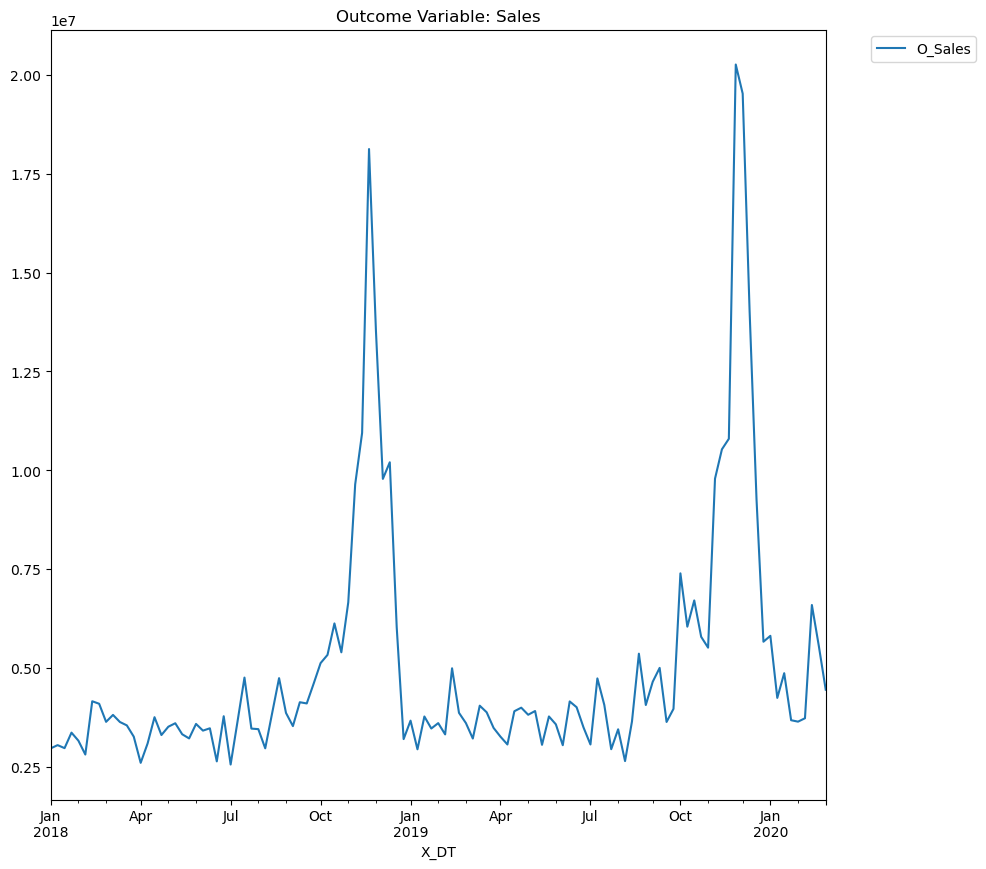

In [48]:
df.plot(x="X_DT", y=["O_Sales"], kind="line", figsize=(10, 10))
plt.title("Outcome Variable: Sales")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

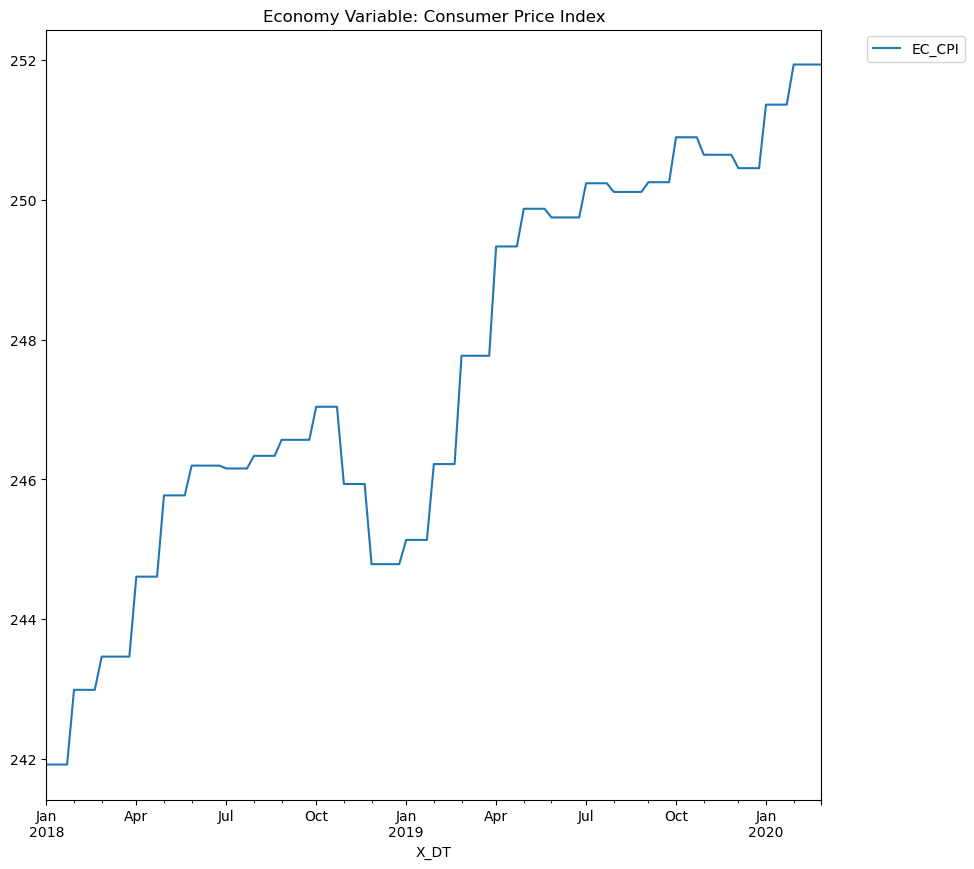

In [47]:
df.plot(x="X_DT", y=["EC_CPI"], kind="line", figsize=(10, 10))
plt.title("Economy Variable: Consumer Price Index")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

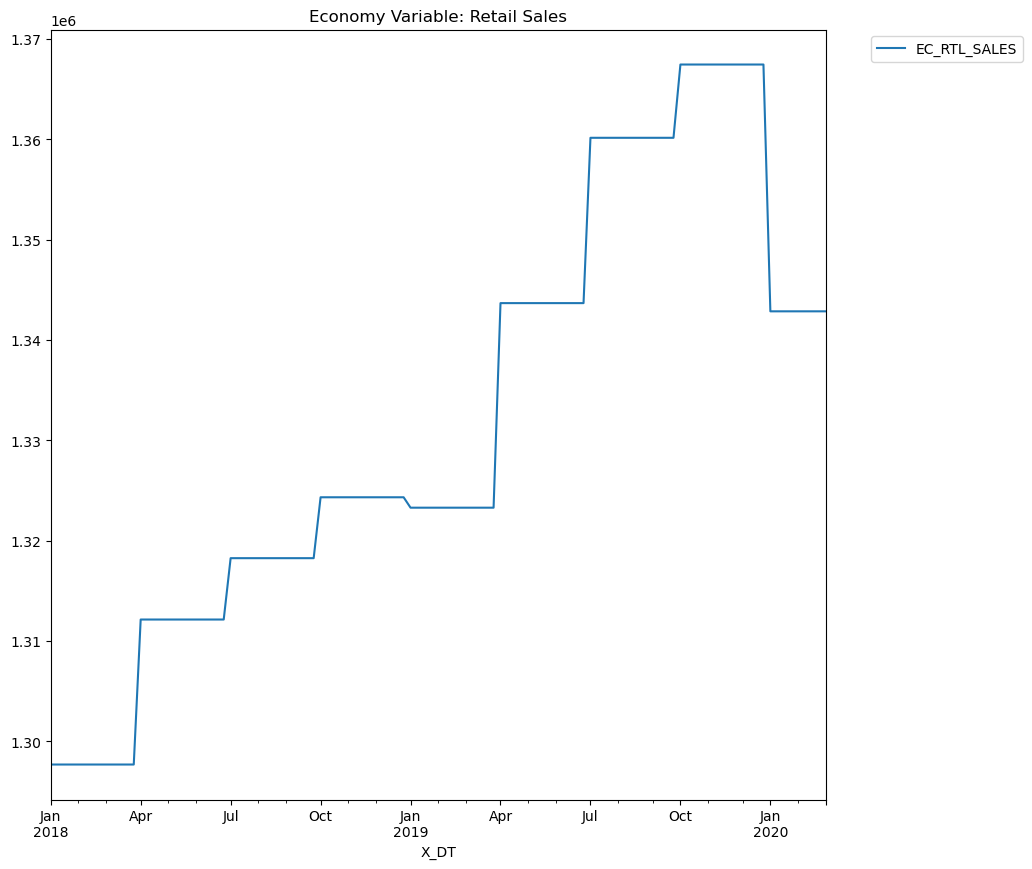

In [46]:
df.plot(x="X_DT", y=["EC_RTL_SALES"], kind="line", figsize=(10, 10))
plt.title("Economy Variable: Retail Sales")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

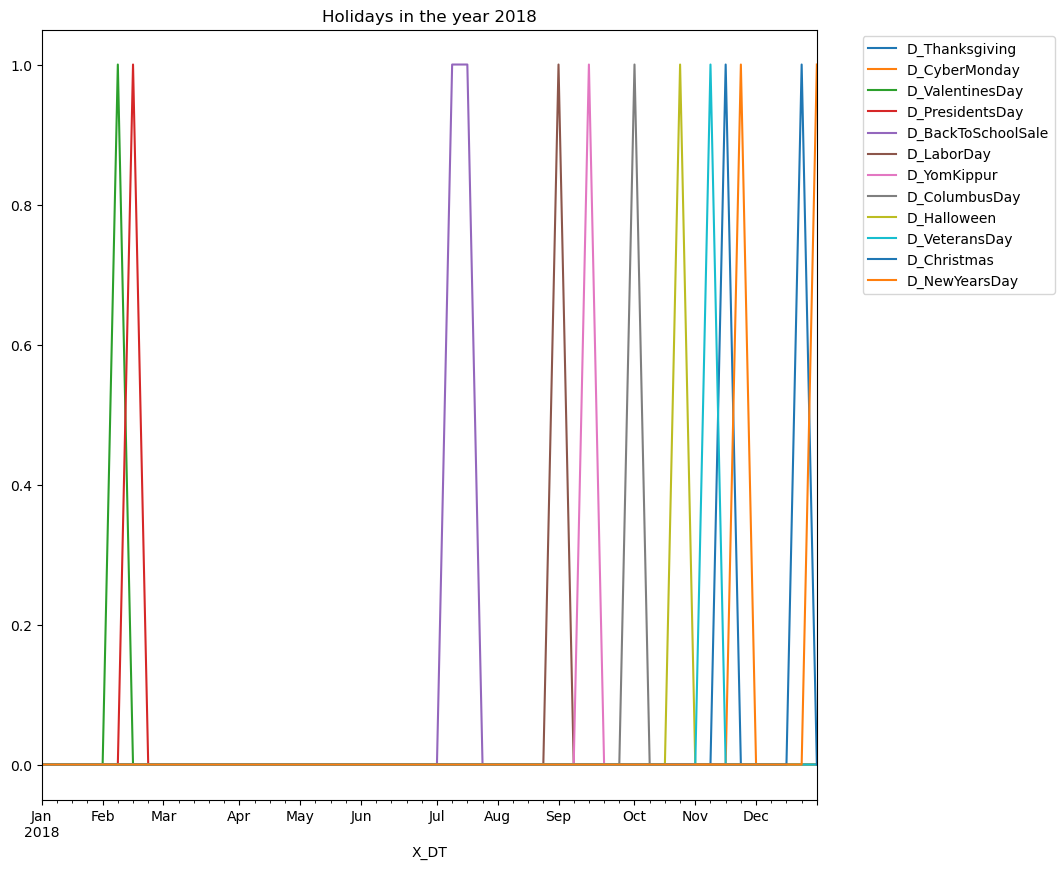

In [43]:
df.loc['2018-01-01':'2018-12-31'].plot(x="X_DT", y=["D_Thanksgiving",
                      "D_CyberMonday",
                      "D_ValentinesDay",
                      "D_PresidentsDay",
                      "D_BackToSchoolSale",
                      "D_LaborDay",
                      "D_YomKippur",
                      "D_ColumbusDay",
                      "D_Halloween",
                      "D_VeteransDay",
                      "D_Christmas",
                      "D_NewYearsDay"], kind="line", figsize=(10, 10))
plt.title("Holidays in the year 2018")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

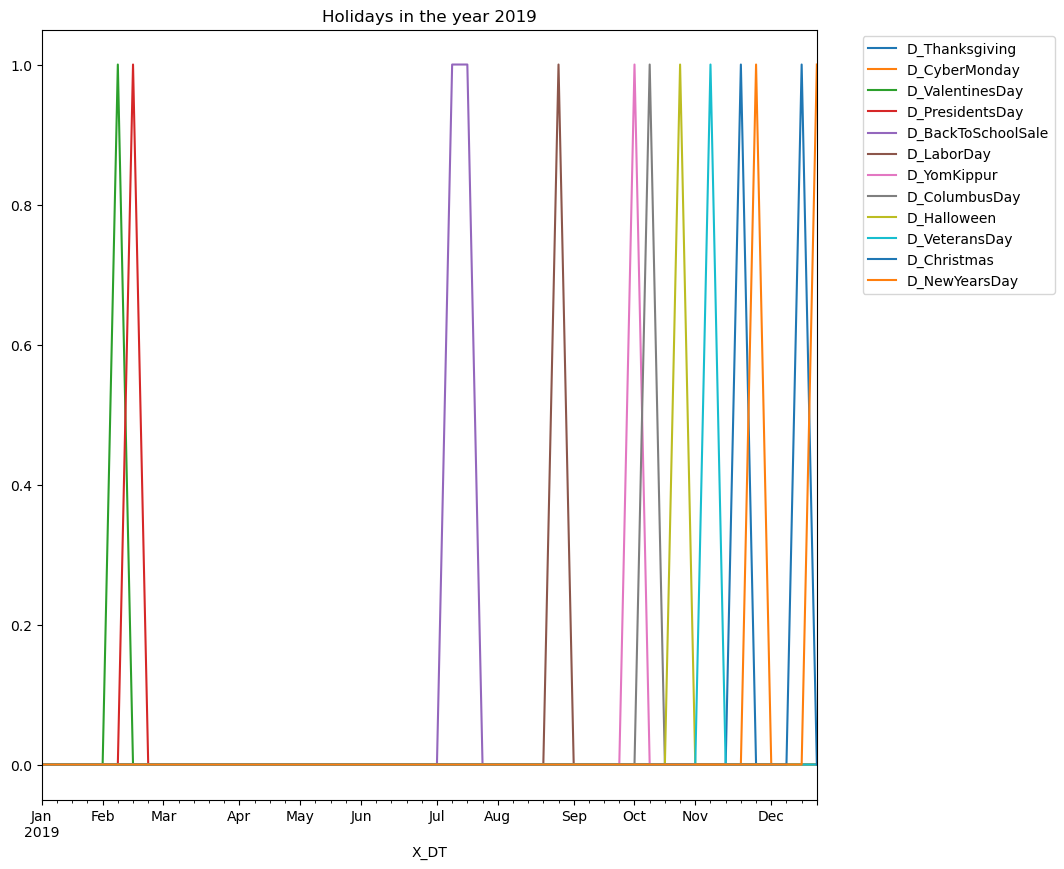

In [44]:
df.loc['2019-01-01':'2019-12-31'].plot(x="X_DT", y=["D_Thanksgiving",
                      "D_CyberMonday",
                      "D_ValentinesDay",
                      "D_PresidentsDay",
                      "D_BackToSchoolSale",
                      "D_LaborDay",
                      "D_YomKippur",
                      "D_ColumbusDay",
                      "D_Halloween",
                      "D_VeteransDay",
                      "D_Christmas",
                      "D_NewYearsDay"], kind="line", figsize=(10, 10))
plt.title("Holidays in the year 2019")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

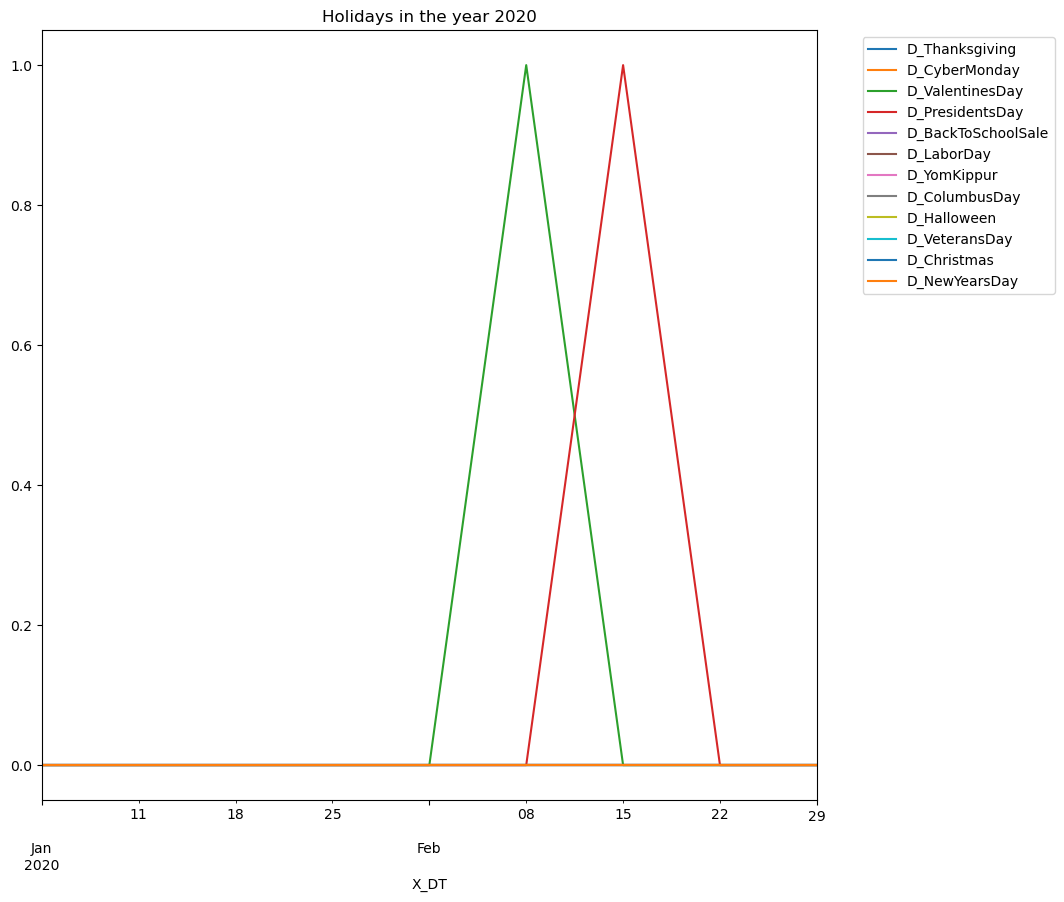

In [45]:
df.loc['2020-01-01':'2020-12-31'].plot(x="X_DT", y=["D_Thanksgiving",
                      "D_CyberMonday",
                      "D_ValentinesDay",
                      "D_PresidentsDay",
                      "D_BackToSchoolSale",
                      "D_LaborDay",
                      "D_YomKippur",
                      "D_ColumbusDay",
                      "D_Halloween",
                      "D_VeteransDay",
                      "D_Christmas",
                      "D_NewYearsDay"], kind="line", figsize=(10, 10))
plt.title("Holidays in the year 2020")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

(17497.8, 18360.2, 0.0, 21682371.9)

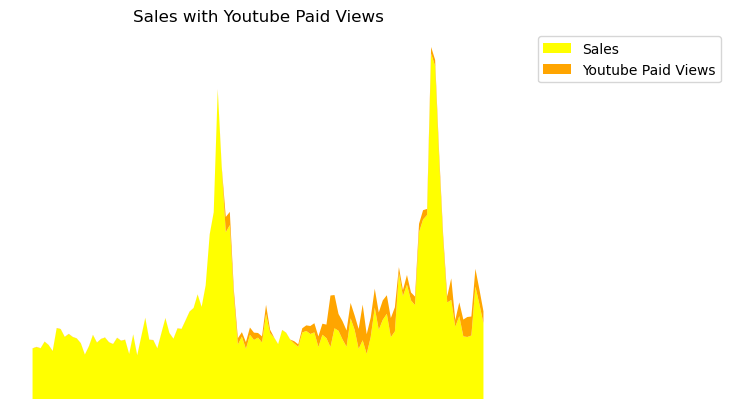

In [68]:
plt.stackplot(df.X_DT, df.O_Sales, df.M_Paid_Views, labels=["Sales", "Youtube Paid Views"], colors=["yellow", "orange"])
plt.title("Sales with Youtube Paid Views")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.axis('off')

(17497.8, 18360.2, 0.0, 21940769.55)

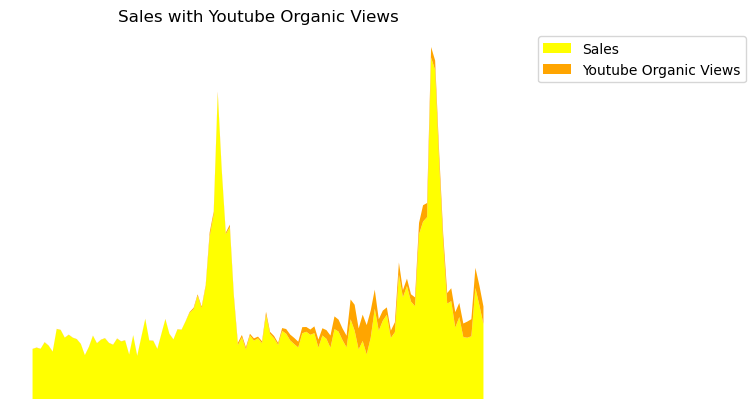

In [67]:
plt.stackplot(df.X_DT, df.O_Sales, df.M_Organic_Views, labels=["Sales", "Youtube Organic Views"], colors=["yellow", "orange"])
plt.title("Sales with Youtube Organic Views")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.axis('off')

(17497.8, 18360.2, 0.0, 126966168.0)

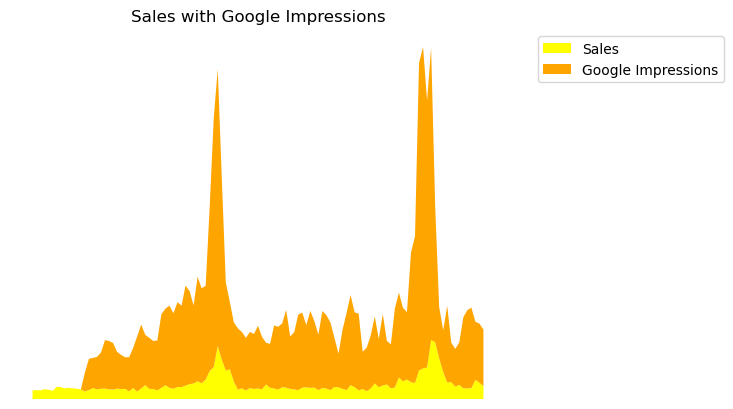

In [66]:
plt.stackplot(df.X_DT, df.O_Sales, df.M_Google_Impressions, labels=["Sales", "Google Impressions"], colors=["yellow", "orange"])
plt.title("Sales with Google Impressions")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.axis('off')

(17497.8, 18360.2, 0.0, 60179236.95)

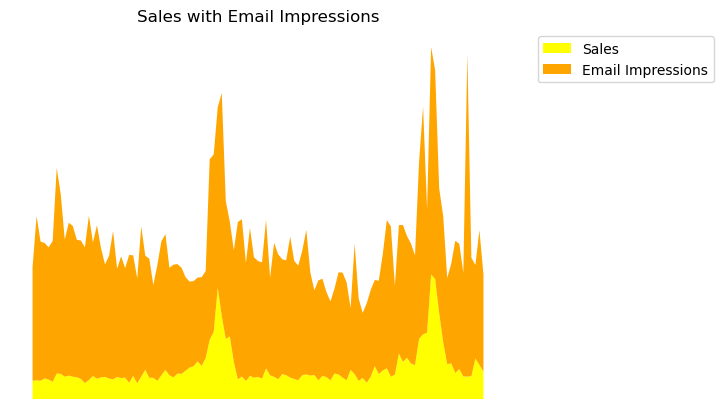

In [65]:
plt.stackplot(df.X_DT, df.O_Sales, df.M_Email_Impressions, labels=["Sales", "Email Impressions"], colors=["yellow", "orange"])
plt.title("Sales with Email Impressions")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.axis('off')

(17497.8, 18360.2, 0.0, 68741417.85)

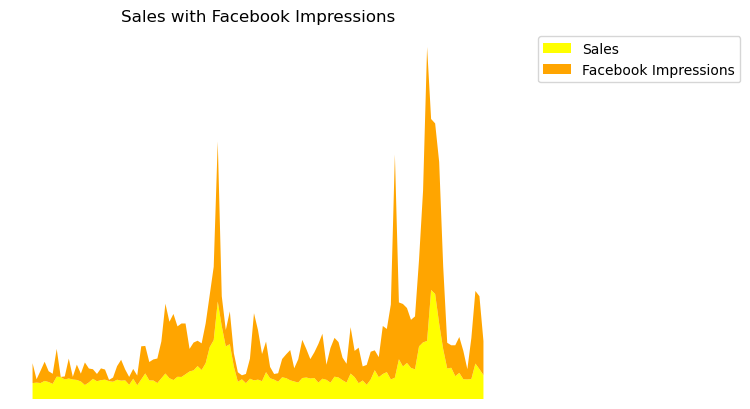

In [64]:
plt.stackplot(df.X_DT, df.O_Sales, df.M_Facebook_Impressions, labels=["Sales", "Facebook Impressions"], colors=["yellow", "orange"])
plt.title("Sales with Facebook Impressions")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.axis('off')

(17497.8, 18360.2, 0.0, 21735622.65)

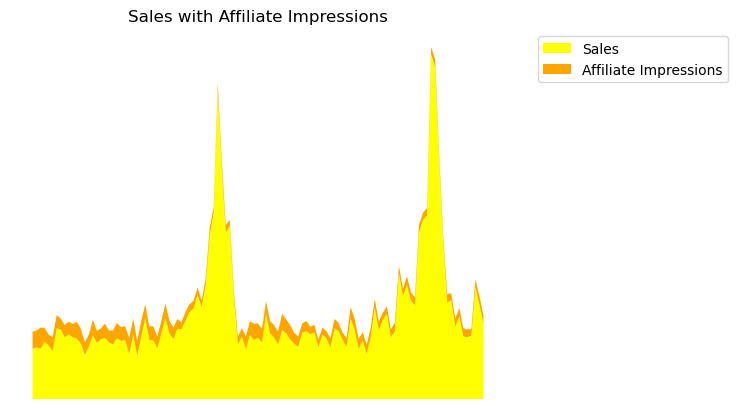

In [63]:
plt.stackplot(df.X_DT, df.O_Sales, df.M_Affiliate_Impressions, labels=["Sales", "Affiliate Impressions"], colors=["yellow", "orange"])
plt.title("Sales with Affiliate Impressions")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.axis('off')

(17497.8, 18360.2, 0.0, 22323648.9)

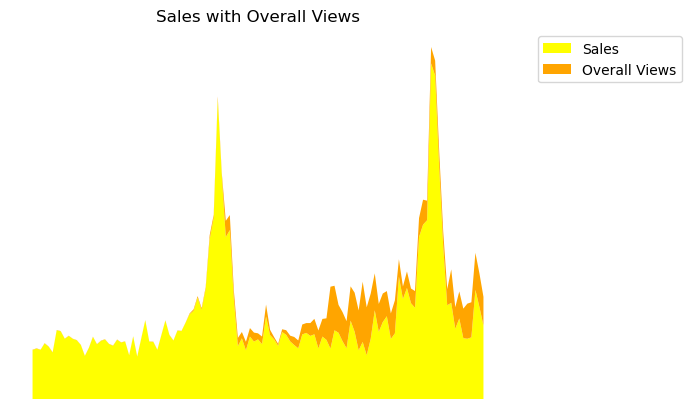

In [62]:
plt.stackplot(df.X_DT, df.O_Sales, df.M_Overall_Views, labels=["Sales", "Overall Views"], colors=["yellow", "orange"])
plt.title("Sales with Overall Views")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.axis('off')